In [1]:
# try to import library, if it is not installed it will be downloaded (required to run code on Google Colab)
import os
try:
  import autoscattering
except:
  if not os.path.isdir('autoscatter'):
    !git clone https://github.com/jlandgr/autoscatter.git
    !mv autoscatter/autoscattering .

In [2]:
import numpy as np
import sympy as sp
import scipy.optimize as sciopt

import jax
import copy
jax.config.update("jax_enable_x64", True)

import jax.numpy as jnp

import autoscattering.symbolic as sym
import time
import matplotlib.pyplot as plt
import matplotlib as mpl
import autoscattering.constraints as msc
import autoscattering.architecture_optimizer as arch_opt
from tqdm import trange

np.set_printoptions(linewidth=200)

In [4]:
# Do not allow any coupling between the (optical) port modes
enforced_constraints = [msc.Constraint_coupling_zero(0,1), msc.Constraint_coupling_zero(0,2), msc.Constraint_coupling_zero(1,2)]

# Define target scattering behavior
S_target = sp.Matrix([[0,1,0],[0,0,1],[1,0,0]])
sym.render(S_target)

# All couplings to the zero-loss modes are rescaled by the respective detuning (see paper).
# However, the sign of the detuning is still free to be chosen. You have to loop over all possible signs using the signs_zero_loss_detunings parameter.
# It is a list whose elements include the sign of all zero-loss modes. For two zero-loss modes, you have to test the combinations [1,1] and [1,-1]. All other are covered by symmetry.

optimizer = arch_opt.Architecture_Optimizer(
    S_target=S_target,
    num_auxiliary_modes=0, # no auxiliary modes
    num_zero_loss_modes=2, # two zero-loss modes
    signs_zero_loss_detunings=[1, -1], 
    enforced_constraints=enforced_constraints
)

<IPython.core.display.Math object>

fully connected graph is a valid graph


In [5]:
irreducible_graphs = optimizer.perform_depth_first_search()

prepare list of all possible graphs


5832it [00:00, 223430.59it/s]


5832 graphs identified
start depth-first search
test all graphs with 17 degrees of freedom:


100%|██████████| 1/1 [00:00<00:00,  3.77it/s]


test all graphs with 16 degrees of freedom:


100%|██████████| 9/9 [00:00<00:00, 17.98it/s]


test all graphs with 15 degrees of freedom:


100%|██████████| 42/42 [00:02<00:00, 19.40it/s]


test all graphs with 14 degrees of freedom:


100%|██████████| 132/132 [00:07<00:00, 18.55it/s]


test all graphs with 13 degrees of freedom:


100%|██████████| 309/309 [00:25<00:00, 12.11it/s]


test all graphs with 12 degrees of freedom:


100%|██████████| 426/426 [00:21<00:00, 20.25it/s]


test all graphs with 11 degrees of freedom:


100%|██████████| 414/414 [00:23<00:00, 17.67it/s]


test all graphs with 10 degrees of freedom:


100%|██████████| 225/225 [00:11<00:00, 19.28it/s]


test all graphs with 9 degrees of freedom:


100%|██████████| 54/54 [00:02<00:00, 18.47it/s]


test all graphs with 8 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 7 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 6 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 5 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 4 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 3 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 2 degrees of freedom:


0it [00:00, ?it/s]

optimisation finished, list of irreducible graphs has 54 elements


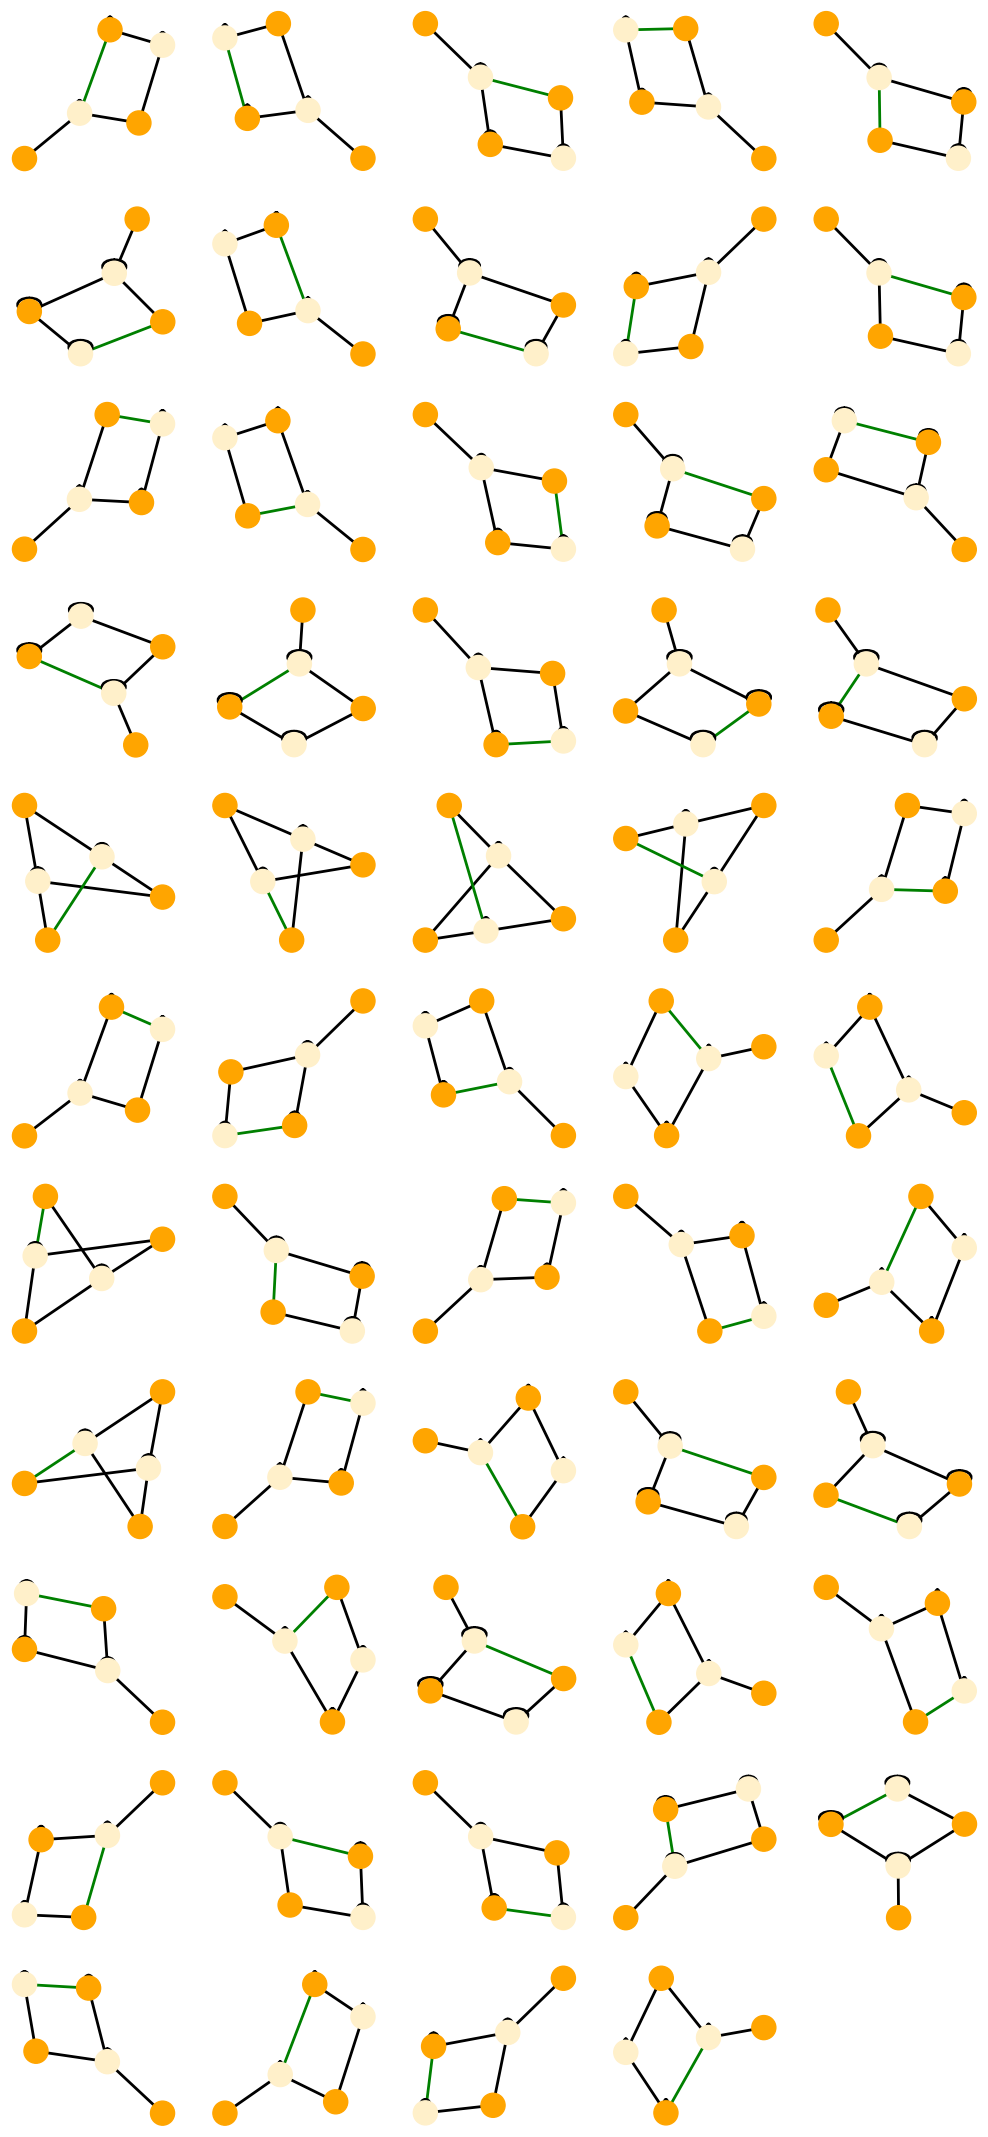

In [6]:
# Plot all identified graphs, all of them are identical (up to symmetry or gauge transformations) with the two graphs shown in Fig. 4b: Irreducible graphs
node_colors = ['orange', 'orange', 'orange', '#FFF0CA', '#FFF0CA']
msc.plot_list_of_graphs(irreducible_graphs, node_colors=node_colors)

In [7]:
# For completeness: Try out the other sign combination for the detunings
optimizer = arch_opt.Architecture_Optimizer(
    S_target=S_target,
    num_auxiliary_modes=0, # no auxiliary modes
    num_zero_loss_modes=2, # two zero-loss modes
    signs_zero_loss_detunings=[1, 1], 
    enforced_constraints=enforced_constraints
)
irreducible_graphs = optimizer.perform_depth_first_search()

fully connected graph is a valid graph
prepare list of all possible graphs


5832it [00:00, 334100.68it/s]


5832 graphs identified
start depth-first search
test all graphs with 17 degrees of freedom:


100%|██████████| 1/1 [00:00<00:00, 12.83it/s]


test all graphs with 16 degrees of freedom:


100%|██████████| 9/9 [00:00<00:00, 18.69it/s]


test all graphs with 15 degrees of freedom:


100%|██████████| 42/42 [00:05<00:00,  7.22it/s]


test all graphs with 14 degrees of freedom:


100%|██████████| 113/113 [00:06<00:00, 17.39it/s]


test all graphs with 13 degrees of freedom:


100%|██████████| 240/240 [00:16<00:00, 14.69it/s]


test all graphs with 12 degrees of freedom:


100%|██████████| 291/291 [00:15<00:00, 19.17it/s]


test all graphs with 11 degrees of freedom:


100%|██████████| 229/229 [00:13<00:00, 16.46it/s]


test all graphs with 10 degrees of freedom:


100%|██████████| 72/72 [00:04<00:00, 16.78it/s]


test all graphs with 9 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 8 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 7 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 6 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 5 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 4 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 3 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 2 degrees of freedom:


0it [00:00, ?it/s]


optimisation finished, list of irreducible graphs has 72 elements


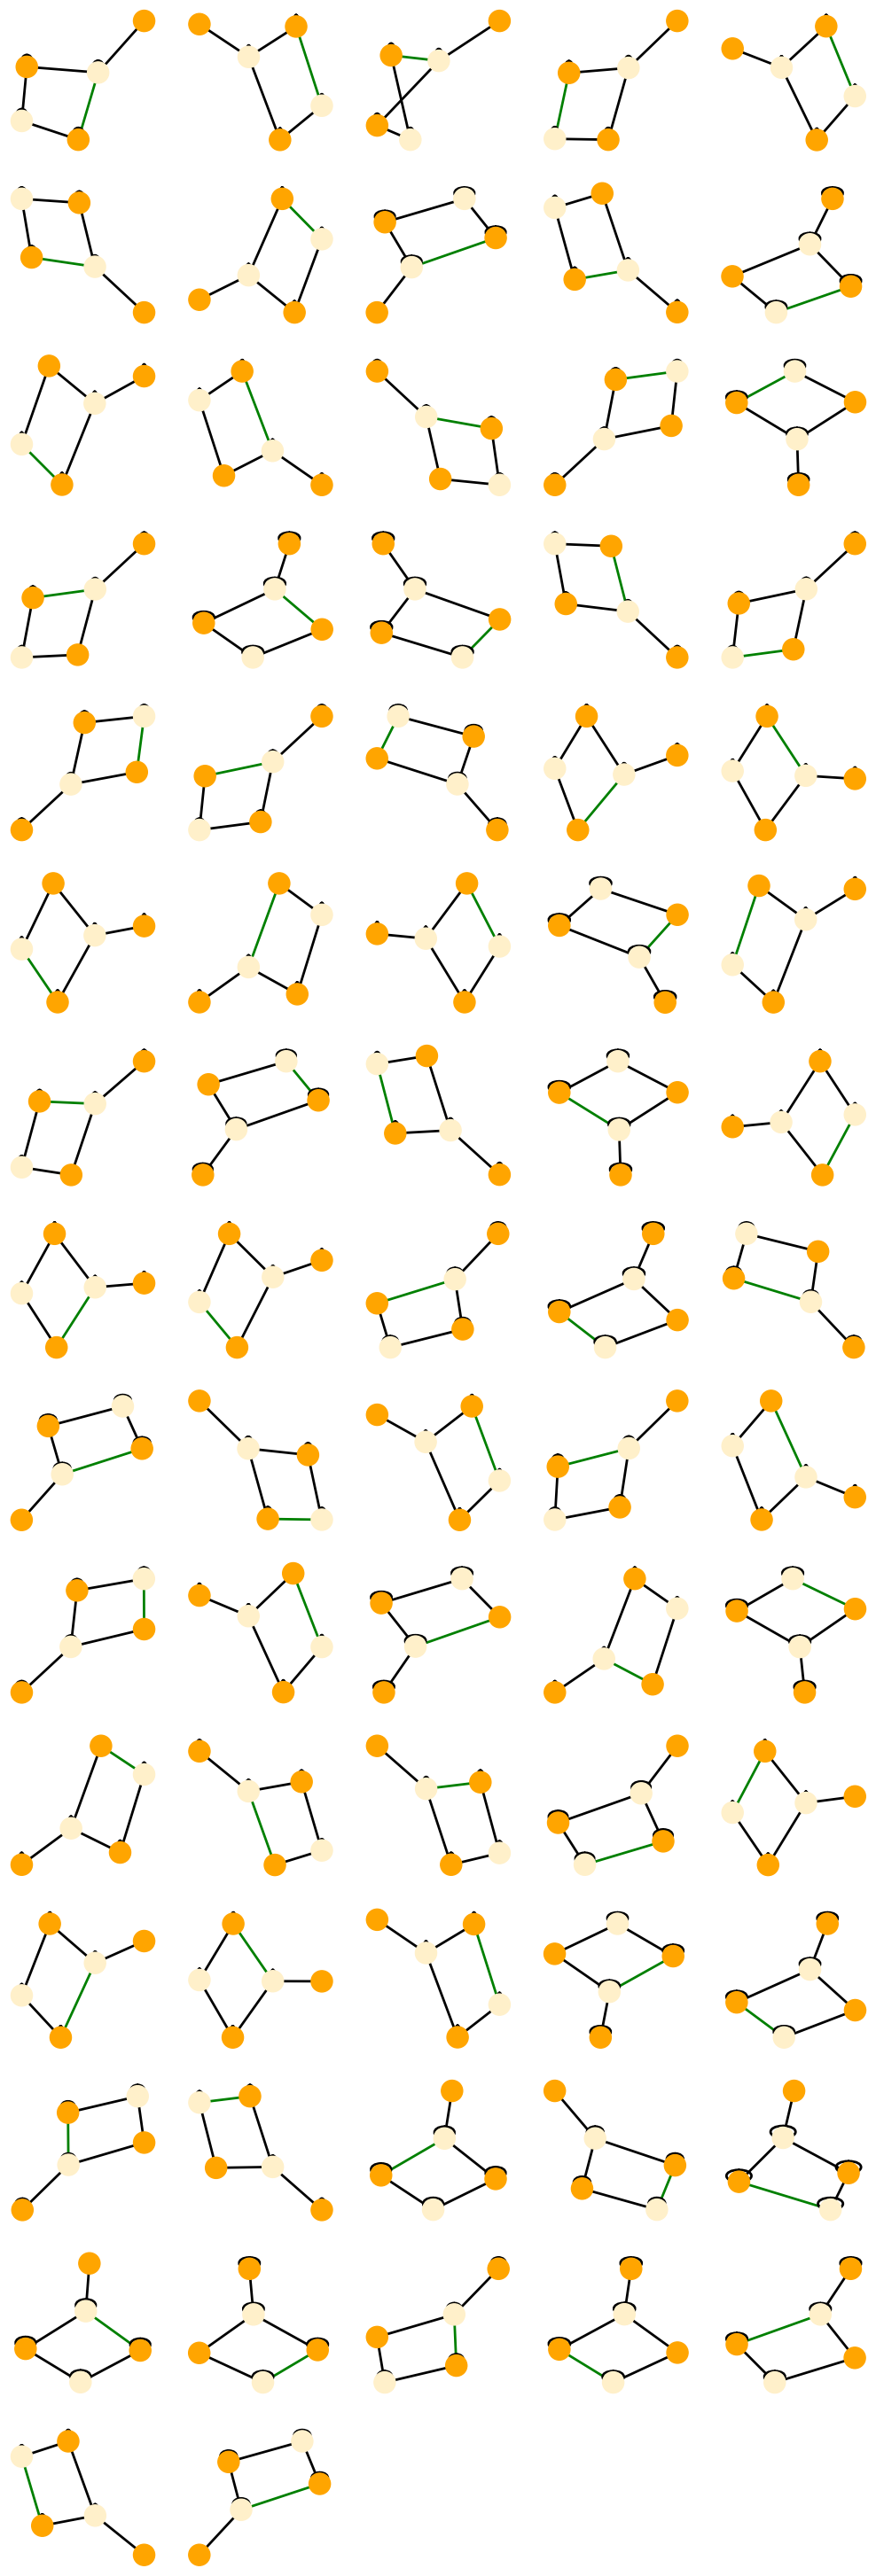

In [8]:
# Plot all identified graphs, all graphs equal the rightmost graph in Fig.3(b), besides having one detuning more.
node_colors = ['orange', 'orange', 'orange', '#FFF0CA', '#FFF0CA']
msc.plot_list_of_graphs(irreducible_graphs, node_colors=node_colors)

In [10]:
# We now loosen the contraints on the couplings between the port modes. Couplings between them are now allowed.
# However they have be real valued to make sure that all couplings between the port modes can be implemented passively.
enforced_constraints = [msc.Constraint_coupling_phase_zero(0,1), msc.Constraint_coupling_phase_zero(0,2), msc.Constraint_coupling_phase_zero(1,2)]

optimizer = arch_opt.Architecture_Optimizer(
    S_target=S_target,
    num_auxiliary_modes=0, # no auxiliary modes
    num_zero_loss_modes=1, 
    signs_zero_loss_detunings=[1], #only the relative sign between zero-loss modes is relevant, so the sign here does not matter
    enforced_constraints=enforced_constraints
)
irreducible_graphs = optimizer.perform_depth_first_search()

fully connected graph is a valid graph
prepare list of all possible graphs


1728it [00:00, 471982.11it/s]


1728 graphs identified
start depth-first search
test all graphs with 16 degrees of freedom:


100%|██████████| 1/1 [00:00<00:00, 18.88it/s]


test all graphs with 15 degrees of freedom:


100%|██████████| 6/6 [00:00<00:00, 22.42it/s]


test all graphs with 14 degrees of freedom:


100%|██████████| 21/21 [00:00<00:00, 23.69it/s]


test all graphs with 13 degrees of freedom:


100%|██████████| 53/53 [00:02<00:00, 25.37it/s]


test all graphs with 12 degrees of freedom:


100%|██████████| 99/99 [00:14<00:00,  6.84it/s]


test all graphs with 11 degrees of freedom:


100%|██████████| 87/87 [00:02<00:00, 32.05it/s]


test all graphs with 10 degrees of freedom:


100%|██████████| 63/63 [00:03<00:00, 17.74it/s]


test all graphs with 9 degrees of freedom:


100%|██████████| 14/14 [00:00<00:00, 44.57it/s]


test all graphs with 8 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 7 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 6 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 5 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 4 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 3 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 2 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 1 degrees of freedom:


0it [00:00, ?it/s]


optimisation finished, list of irreducible graphs has 45 elements


100%|██████████| 45/45 [00:00<00:00, 542.93it/s]


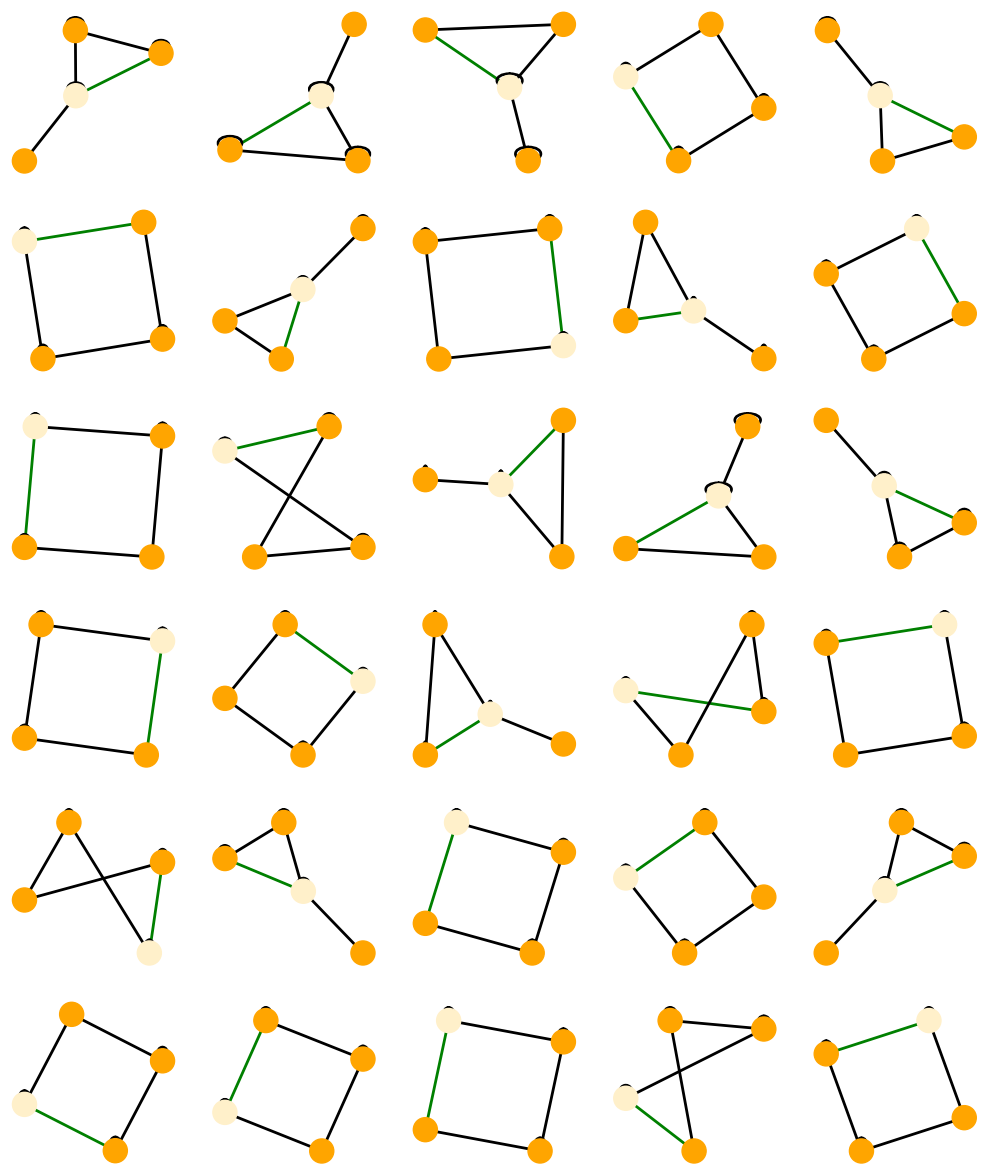

In [11]:
# Plot all identified graphs which have the smallest number of couplings
from autoscattering.architecture import characterize_architectures
irreducible_graphs_info = characterize_architectures(irreducible_graphs)
num_min_couplings = np.min(irreducible_graphs_info['num_couplings'])
idxs = np.where(irreducible_graphs_info['num_couplings'] == num_min_couplings)[0]
irreducible_graphs_min_couplings = irreducible_graphs[idxs]

node_colors = ['orange', 'orange', 'orange', '#FFF0CA']
msc.plot_list_of_graphs(irreducible_graphs_min_couplings, node_colors=node_colors)